In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network on Forest fires Dataset

In [2]:
df=pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# Applying PCA 

In [5]:
df1= df.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                 

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  4.98037274e-16, -2.73530281e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -9.55928328e-15,  1.15055466e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  2.58690766e-15, -5.66797432e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -1.84247930e-16,  2.36645381e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.30354869e-16,  2.72058887e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  5.70142521e-17,  8.50237385e-17]])

In [7]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

Cumulative Variance

In [8]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

Variance plot for PCA components

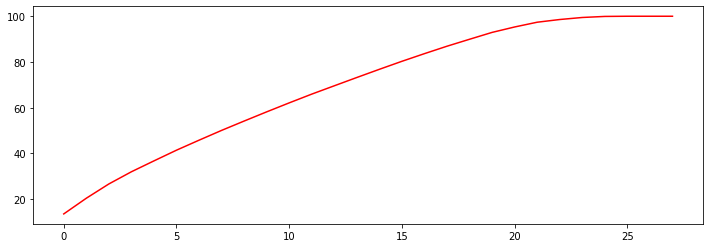

In [9]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [10]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     df[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [11]:
# spliting into input (X) and output (Y) variables
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Creating a Model

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 3s 10ms/step - loss: 0.6593 - accuracy: 0.5983 - val_loss: 0.7221 - val_accuracy: 0.6603
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7424 - val_loss: 0.7190 - val_accuracy: 0.6667
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7590 - val_loss: 0.7172 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7562 - val_loss: 0.7253 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7590 - val_loss: 0.7240 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7618 - val_loss: 0.7352 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7618 - val_loss: 0.7341 - val_accuracy: 0.6731
Epoch 8/150


Epoch 59/150
37/37 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9058 - val_loss: 0.8426 - val_accuracy: 0.7179
Epoch 60/150
37/37 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9141 - val_loss: 0.8330 - val_accuracy: 0.7051
Epoch 61/150
37/37 [==============================] - 0s 985us/step - loss: 0.2199 - accuracy: 0.9169 - val_loss: 0.8349 - val_accuracy: 0.7051
Epoch 62/150
37/37 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9169 - val_loss: 0.8274 - val_accuracy: 0.7308
Epoch 63/150
37/37 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9197 - val_loss: 0.8420 - val_accuracy: 0.7179
Epoch 64/150
37/37 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9197 - val_loss: 0.8471 - val_accuracy: 0.7051
Epoch 65/150
37/37 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9224 - val_loss: 0.8551 - val_accuracy: 0.7115
Epoc

37/37 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9751 - val_loss: 1.0145 - val_accuracy: 0.8077
Epoch 117/150
37/37 [==============================] - 0s 906us/step - loss: 0.0845 - accuracy: 0.9751 - val_loss: 1.0215 - val_accuracy: 0.8013
Epoch 118/150
37/37 [==============================] - 0s 984us/step - loss: 0.0829 - accuracy: 0.9778 - val_loss: 1.0155 - val_accuracy: 0.8141
Epoch 119/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9751 - val_loss: 1.0237 - val_accuracy: 0.8141
Epoch 120/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9778 - val_loss: 1.0451 - val_accuracy: 0.8141
Epoch 121/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9751 - val_loss: 1.0398 - val_accuracy: 0.8141
Epoch 122/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9778 - val_loss: 1.0586 - val_accuracy: 0.8141
Epoch 123

# Model Evaluation

In [15]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 873us/step - loss: 0.4094 - accuracy: 0.9400
accuracy: 94.00%


# Neural Network on Gas turbine dataset

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

In [36]:
turbine_data= pd.read_csv('gas_turbines.csv')

In [37]:
df= turbine_data.copy()

In [38]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [40]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [41]:
df.isnull().sum().sum()

0

In [42]:
x= df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
print(x)
y= df['TEY']
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

In [43]:
x_standerdized= (x-x.mean())/x.std()
x_standerdized

In [44]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [45]:
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [46]:
# create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... batch_size=50, epochs=10, score=-171.339, total=   2.9s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-49.760, total=   2.7s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-56.368, total=   2.3s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-51.269, total=   2.3s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-59.401, total=   2.2s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.920, total=   6.8s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.1s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.433, total=   6.9s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.0s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.799, total=   6.8s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.544, total=   6.7s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   39.5s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-1.438, total=   6.6s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.755, total=  11.4s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.490, total=  12.2s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.591, total=  12.8s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.598, total=  12.8s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.718, total=  12.3s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........ batch_size=100, epochs=10, score=-330.689, total=   1.6s
[CV] batch_size=100, epochs=10 .......................................
[CV] .

[CV] ........ batch_size=800, epochs=50, score=-715.222, total=   1.5s
[CV] batch_size=800, epochs=50 .......................................
[CV] ........ batch_size=800, epochs=50, score=-310.240, total=   1.5s
[CV] batch_size=800, epochs=50 .......................................
[CV] ........ batch_size=800, epochs=50, score=-291.119, total=   1.8s
[CV] batch_size=800, epochs=100 ......................................
[CV] ....... batch_size=800, epochs=100, score=-242.878, total=   2.0s
[CV] batch_size=800, epochs=100 ......................................
[CV] ........ batch_size=800, epochs=100, score=-50.254, total=   2.0s
[CV] batch_size=800, epochs=100 ......................................
[CV] ....... batch_size=800, epochs=100, score=-123.117, total=   2.1s
[CV] batch_size=800, epochs=100 ......................................
[CV] ........ batch_size=800, epochs=100, score=-98.211, total=   2.2s
[CV] batch_size=800, epochs=100 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.9min finished


In [47]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6303272604942322, using {'batch_size': 50, 'epochs': 100}
-77.62733306884766,46.984039083674 with: {'batch_size': 50, 'epochs': 10}
-0.8265738427639008,0.3517648556035991 with: {'batch_size': 50, 'epochs': 50}
-0.6303272604942322,0.09550140289115999 with: {'batch_size': 50, 'epochs': 100}
-246.36460876464844,85.68278271122355 with: {'batch_size': 100, 'epochs': 10}
-1.9049873352050781,0.8293758215251685 with: {'batch_size': 100, 'epochs': 50}
-0.7589312374591828,0.2628912574032711 with: {'batch_size': 100, 'epochs': 100}
-809.11298828125,286.9889285971013 with: {'batch_size': 200, 'epochs': 10}
-43.63120651245117,23.520566477048458 with: {'batch_size': 200, 'epochs': 50}
-1.7506044507026672,1.1352879201211958 with: {'batch_size': 200, 'epochs': 100}
-5257.875390625,1165.543093186542 with: {'batch_size': 400, 'epochs': 10}
-167.7348892211914,52.03553357914714 with: {'batch_size': 400, 'epochs': 50}
-21.02638473510742,10.704417054823564 with: {'batch_size': 400, 'epochs': 100}
-1

In [48]:
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
# Define grid search model
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]
# Make a dictionary of grid search parameters
param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.880, total=   7.4s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.400, total=   6.7s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-1.144, total=   6.8s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.8s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.472, total=   7.5s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.3s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.819, total=   6.8s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.0s remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-2.539, total=   7.7s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   42.7s remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.661, total=   6.9s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   49.6s remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.787, total=   6.3s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   55.9s remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.524, total=   7.6s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.891, total=   7.6s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-2.996, total=   7.5s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-0.970, total=   7.9s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-1.538, total=   7.2s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-2.350, total=   7.7s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-0.726, total=   6.4s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV] .. dropout_rate=0, learning_rate=0.2, score=-2.178, total=   7.6s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV] .

[CV]  dropout_rate=0.2, learning_rate=0.2, score=-62.611, total=   8.2s
[CV] dropout_rate=0.2, learning_rate=0.2 .............................
[CV]  dropout_rate=0.2, learning_rate=0.2, score=-32.955, total=   8.6s
[CV] dropout_rate=0.2, learning_rate=0.2 .............................
[CV]  dropout_rate=0.2, learning_rate=0.2, score=-59.758, total=   8.4s
[CV] dropout_rate=0.2, learning_rate=0.5 .............................
[CV]  dropout_rate=0.2, learning_rate=0.5, score=-344.787, total=   8.3s
[CV] dropout_rate=0.2, learning_rate=0.5 .............................
[CV]  dropout_rate=0.2, learning_rate=0.5, score=-87.068, total=   8.9s
[CV] dropout_rate=0.2, learning_rate=0.5 .............................
[CV]  dropout_rate=0.2, learning_rate=0.5, score=-318.975, total=   8.5s
[CV] dropout_rate=0.2, learning_rate=0.5 .............................
[CV]  dropout_rate=0.2, learning_rate=0.5, score=-236.235, total=   8.1s
[CV] dropout_rate=0.2, learning_rate=0.5 ..........................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 10.2min finished


In [49]:
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.7430060386657715, using {'dropout_rate': 0, 'learning_rate': 0.001}
-0.7430060386657715,0.27457883643385017 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-1.0807079434394837,0.7395768650965056 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-1.7159300327301026,0.8495368800904567 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-1.5173593759536743,0.5501555371238772 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-6.177544784545899,5.889242604070235 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-12.672068786621093,2.366218922267634 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-6.004189896583557,4.852163476374612 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-17.40024757385254,6.662949866034524 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-33.17603530883789,28.693275867277876 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-164.84982299804688,105.9901643111797 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-32.00689849853516,10.50052212560291 with: {'d

In [50]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
# Define grid search model
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']
# Make a dictionary of grid search parameters
param_grid= dict(activation_function= activation_function, init=init)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=linear, init=uniform, score=-0.754, total=   7.4s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.435, total=   7.0s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.3s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.838, total=   7.5s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.8s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.424, total=   7.6s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.3s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.585, total=   7.0s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.3s remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.790, total=   7.4s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.7s remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.463, total=   7.5s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   51.3s remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.713, total=   6.6s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   57.9s remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.523, total=   6.4s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.649, total=   6.7s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-15681.713, total=   6.8s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-13996.440, total=   7.3s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-16285.141, total=   7.4s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-15403.896, total=   6.9s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-14512.562, total=   7.5s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=-0.939, total=   7.5s
[CV] activation_function=relu, init=unif

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.6min finished


In [51]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6075028121471405, using {'activation_function': 'linear', 'init': 'uniform'}
-0.6075028121471405,0.16633264536205253 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.6277311265468597,0.12034170230525439 with: {'activation_function': 'linear', 'init': 'normal'}
-15175.9505859375,820.900157811348 with: {'activation_function': 'linear', 'init': 'zero'}
-0.7020758926868439,0.1786475455672765 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.6861273527145386,0.20180507922159854 with: {'activation_function': 'relu', 'init': 'normal'}
-15175.92890625,820.8863703654935 with: {'activation_function': 'relu', 'init': 'zero'}


In [52]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
# Define grid search model
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
# Make a dictionary of grid search parameters
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.686, total=   7.6s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.586, total=   6.8s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.4s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.627, total=   7.3s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.7s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.471, total=   7.3s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.0s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.577, total=   7.4s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.4s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.850, total=   7.1s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.5s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.603, total=   6.9s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   50.4s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.743, total=   7.1s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   57.5s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.638, total=   9.1s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.684, total=   7.8s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.837, total=   8.8s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.422, total=   8.5s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.690, total=   8.1s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.474, total=   6.5s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.553, total=   7.3s
[CV] neuron1=4, neuron2=8, neuron3=4 .................................
[CV] .... neuron1=4, neuron2=8, neuron3=4, score=-1.014, total=   7.4s
[CV] neuron1=4, neuron2=8, neuron3=4 .................................
[CV] .

[CV] .... neuron1=8, neuron2=8, neuron3=8, score=-0.924, total=   6.4s
[CV] neuron1=8, neuron2=8, neuron3=8 .................................
[CV] .... neuron1=8, neuron2=8, neuron3=8, score=-0.452, total=   7.6s
[CV] neuron1=8, neuron2=8, neuron3=8 .................................
[CV] .... neuron1=8, neuron2=8, neuron3=8, score=-0.578, total=   7.0s
[CV] neuron1=8, neuron2=8, neuron3=16 ................................
[CV] ... neuron1=8, neuron2=8, neuron3=16, score=-0.836, total=   6.7s
[CV] neuron1=8, neuron2=8, neuron3=16 ................................
[CV] ... neuron1=8, neuron2=8, neuron3=16, score=-0.417, total=   7.3s
[CV] neuron1=8, neuron2=8, neuron3=16 ................................
[CV] ... neuron1=8, neuron2=8, neuron3=16, score=-0.734, total=   7.3s
[CV] neuron1=8, neuron2=8, neuron3=16 ................................
[CV] ... neuron1=8, neuron2=8, neuron3=16, score=-0.512, total=   6.3s
[CV] neuron1=8, neuron2=8, neuron3=16 ................................
[CV] .

[CV] .. neuron1=16, neuron2=16, neuron3=8, score=-1.077, total=   6.8s
[CV] neuron1=16, neuron2=16, neuron3=8 ...............................
[CV] .. neuron1=16, neuron2=16, neuron3=8, score=-0.972, total=   6.7s
[CV] neuron1=16, neuron2=16, neuron3=8 ...............................
[CV] .. neuron1=16, neuron2=16, neuron3=8, score=-0.652, total=   6.7s
[CV] neuron1=16, neuron2=16, neuron3=8 ...............................
[CV] .. neuron1=16, neuron2=16, neuron3=8, score=-0.858, total=   7.7s
[CV] neuron1=16, neuron2=16, neuron3=8 ...............................
[CV] .. neuron1=16, neuron2=16, neuron3=8, score=-0.656, total=   6.8s
[CV] neuron1=16, neuron2=16, neuron3=16 ..............................
[CV] . neuron1=16, neuron2=16, neuron3=16, score=-1.727, total=   7.4s
[CV] neuron1=16, neuron2=16, neuron3=16 ..............................
[CV] . neuron1=16, neuron2=16, neuron3=16, score=-0.480, total=   7.4s
[CV] neuron1=16, neuron2=16, neuron3=16 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 16.1min finished


In [53]:
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.5895180881023407, using {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.5895180881023407,0.07076860698092242 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.7035009860992432,0.08684148775097054 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-0.595016622543335,0.15104871959505806 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-0.6667517781257629,0.19039417820079985 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-0.7110422074794769,0.30752754124348863 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-0.6877642869949341,0.11131947764392801 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-0.6873094260692596,0.11403545067847586 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-0.6475640892982483,0.08488151705748558 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-0.6519231796264648,0.0787453742214215 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-0.6235211908817291,0.10161867456051651 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-0.6765466392040252,0.191976814

In [54]:
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=100)
# Fitting model
estimator= model.fit(x_standerdized,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, x_standerdized,y, cv= kfold)
print('mse:', results.mean())

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 1

In [55]:
print('MSE',results.mean())

MSE -0.5845979571342468
